# Modeling

SmallDS

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [87]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:150]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()


Read data from Test and Train csv file

In [88]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

data_train.head()

,area,room,toilet,lat,long,price-VND,loai_bds-code
0,100,0,0,16.06613,108.24356,15000000000,16
1,88,0,0,16.06591,108.24193,7800000000,16
2,100,4,5,16.09384,108.24476,10800000000,14
3,150,0,0,15.98635,108.25687,6200000000,7
4,68,2,2,16.06191,108.23652,3100000000,0


Chia train/validation/test

In [89]:


X = data_train.drop('price-VND', axis=1)
Y = data_train['price-VND']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


x_train


,area,room,toilet,lat,long,loai_bds-code
2034,80,2,2,16.03851,108.24755,0
2281,144,0,0,16.08328,108.22888,7
989,46,2,2,16.05093,108.21592,15
306,80,0,0,16.03513,108.21985,16
10,51,2,2,16.08967,108.23897,16
...,...,...,...,...,...,...
1033,61,0,0,16.03124,108.22654,16
3264,65,2,2,16.06433,108.19121,15
1653,189,0,0,16.06026,108.24300,16
2607,166,0,0,16.08122,108.24407,9


In [90]:
x_test

,area,room,toilet,lat,long,loai_bds-code
533,30,2,1,16.06791,108.20152,15
2814,43,3,3,16.04335,108.22148,15
582,68,0,0,16.04591,108.22215,16
1831,44,2,1,16.07356,108.22082,16
4168,100,0,0,16.00641,108.23998,9
...,...,...,...,...,...,...
3043,63,3,2,16.07431,108.15796,16
4487,96,0,0,16.08441,108.23604,9
2920,100,0,0,16.01412,108.19179,7
1721,75,4,4,16.07896,108.16584,16


# Tạo và lập mô hình bằng Linear Regression

In [91]:
lrg = LinearRegression()
lrg.fit(x_train, y_train)


LinearRegression()

In [92]:
y_pred = lrg.predict(x_test)

Kiểm tra trực quan và dự đoán kết quả

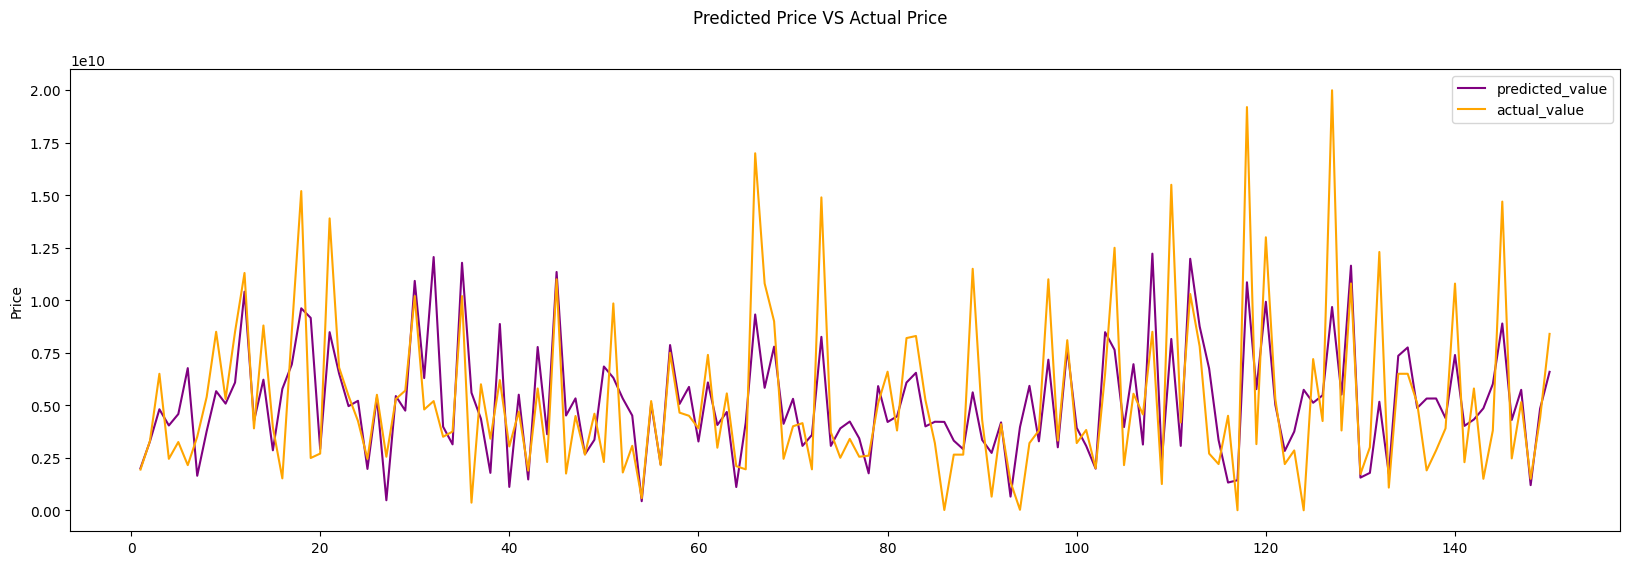

In [93]:
plot_residuals(y_test, y_pred)

Đánh giá mô hình Linear Regression

In [94]:
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  print(f'Accuracy score of {algorithm}:\nR2: {R2}\nRMSE: {rmse}\nMAE: {mae}')
  return (R2, rmse, mae)

In [95]:
R2_linear, rmse_linear, mae_linear=accuracy_score(y_test, y_pred, lrg)

Accuracy score of LinearRegression():
R2: 0.494314958208415
RMSE: 2765429225.6818647
MAE: 1913612580.9830894


# Linear Regression với bộ siêu tham số tối ưu

In [96]:
lrg_hyper = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4]
}
lrg_hyper_search = RandomizedSearchCV(lrg_hyper, param_grid, cv=5)
lrg_hyper_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1, 1, 2, 4]})

In [97]:
lrg_hyper_search.best_params_

{'n_jobs': 4, 'fit_intercept': True, 'copy_X': False}

In [98]:
lrg_hyper = lrg_hyper_search.best_estimator_
lrg_hyper.fit(x_train, y_train)

LinearRegression(copy_X=False, n_jobs=4)

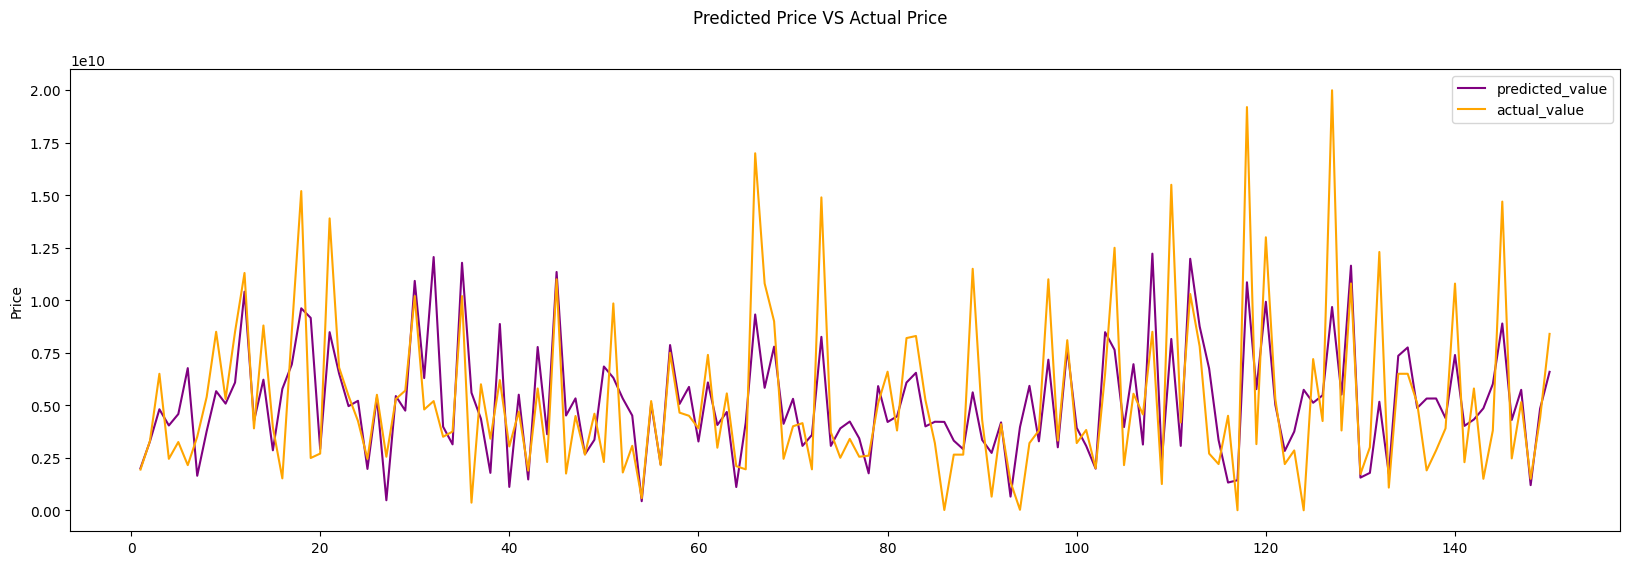

In [99]:
y_pred_linear_hyper = lrg_hyper.predict(x_test)
plot_residuals(y_test, y_pred_linear_hyper)


In [100]:
R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper=accuracy_score(y_test, y_pred_linear_hyper, lrg_hyper)

Accuracy score of LinearRegression(copy_X=False, n_jobs=4):
R2: 0.494314958208415
RMSE: 2765429225.6818647
MAE: 1913612580.9830894


# Tạo và lập mô hình bằng Logistic Regression

In [101]:
regression = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
random_cv = RandomizedSearchCV(regression, param_grid, cv=5)
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']})

Bộ siêu tham số tối ưu

In [102]:
random_cv.best_params_


{'penalty': 'l2', 'C': 0.1}

In [103]:
regression.fit(x_train,y_train)


LogisticRegression()

In [104]:
y_pred_log = regression.predict(x_test)

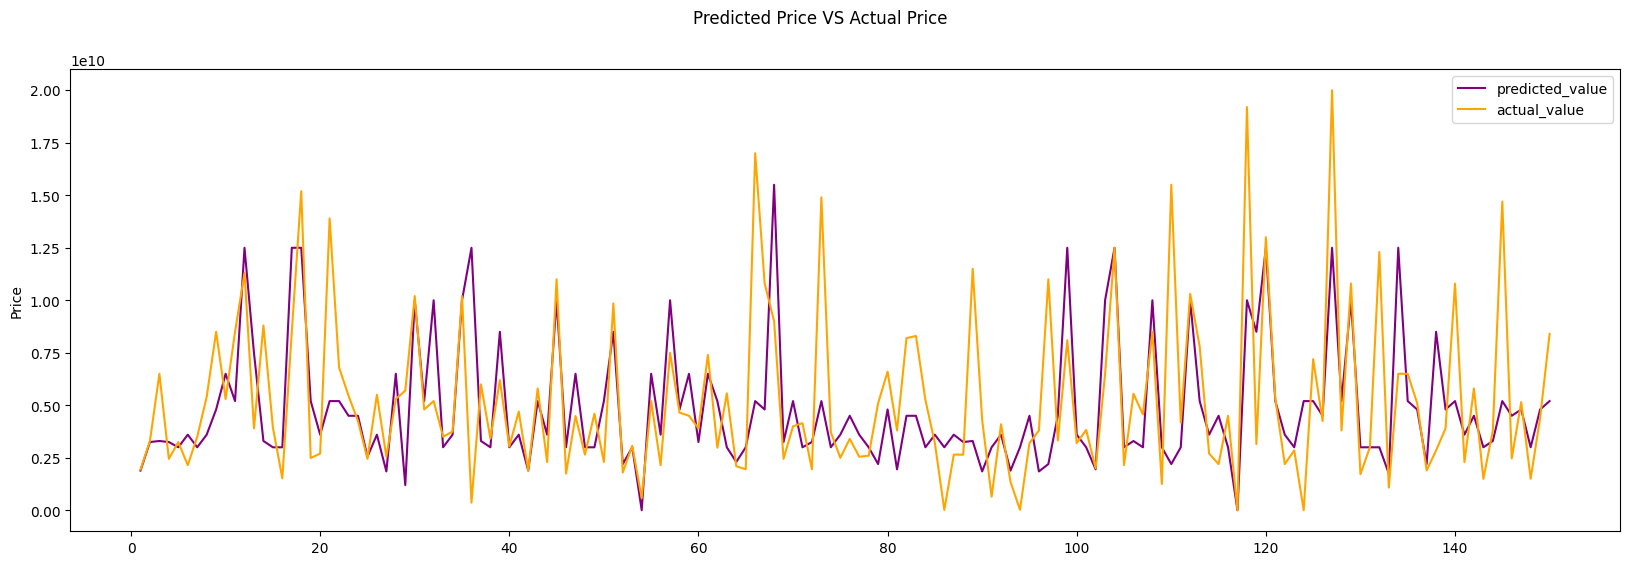

In [105]:
plot_residuals(y_test, y_pred_log)


In [106]:
R2_log, rmse_log, mae_log=accuracy_score(y_test, y_pred_log, regression)

Accuracy score of LogisticRegression():
R2: 0.92542695360255
RMSE: 1061972906.6078874
MAE: 2326162201.1453114


In [107]:

log_hyper = random_cv.best_estimator_
log_hyper.fit(x_train, y_train)

LogisticRegression(C=0.1)

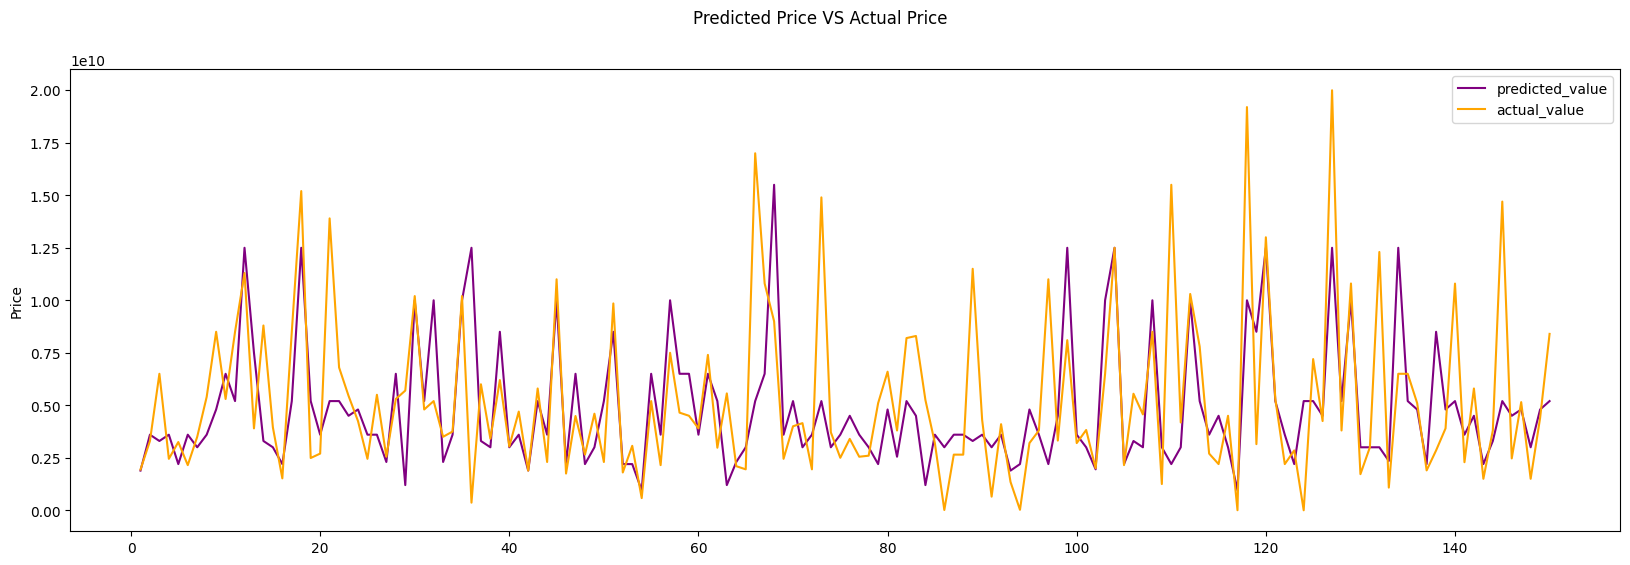

In [108]:
y_pred_log_hyper = log_hyper.predict(x_test)
plot_residuals(y_test, y_pred_log_hyper)

In [109]:
R2_log_hyper, rmse_log_hyper, mae_log_hyper=accuracy_score(y_test, y_pred_log_hyper, log_hyper)

Accuracy score of LogisticRegression(C=0.1):
R2: 0.9242761312222646
RMSE: 1070135796.6299114
MAE: 2279449960.6299214


So sánh Logistic Regression sử dụng siêu tham số với không sử dụng

In [110]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Logistic Regression', R2_log, rmse_log, mae_log]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Logistic Regression,0.925427,1.061973e+09,2.326162e+09
1,Logistic Regression with Hyper parameter,0.924276,1.070136e+09,2.279450e+09


So sánh Logistic Regression với Linear Regression

In [111]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression', R2_linear, rmse_linear, mae_linear]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression,0.494315,2.765429e+09,1.913613e+09
1,Logistic Regression with Hyper parameter,0.924276,1.070136e+09,2.279450e+09


So sánh Logistic Regression với Linear Regression với bộ siêu tham số

In [112]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression with Hyper parameter', R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression with Hyper parameter,0.494315,2.765429e+09,1.913613e+09
1,Logistic Regression with Hyper parameter,0.924276,1.070136e+09,2.279450e+09


kiểm tra lại với test data

In [113]:
x_val= data_test.drop('price-VND', axis=1)
y_val= data_test['price-VND']


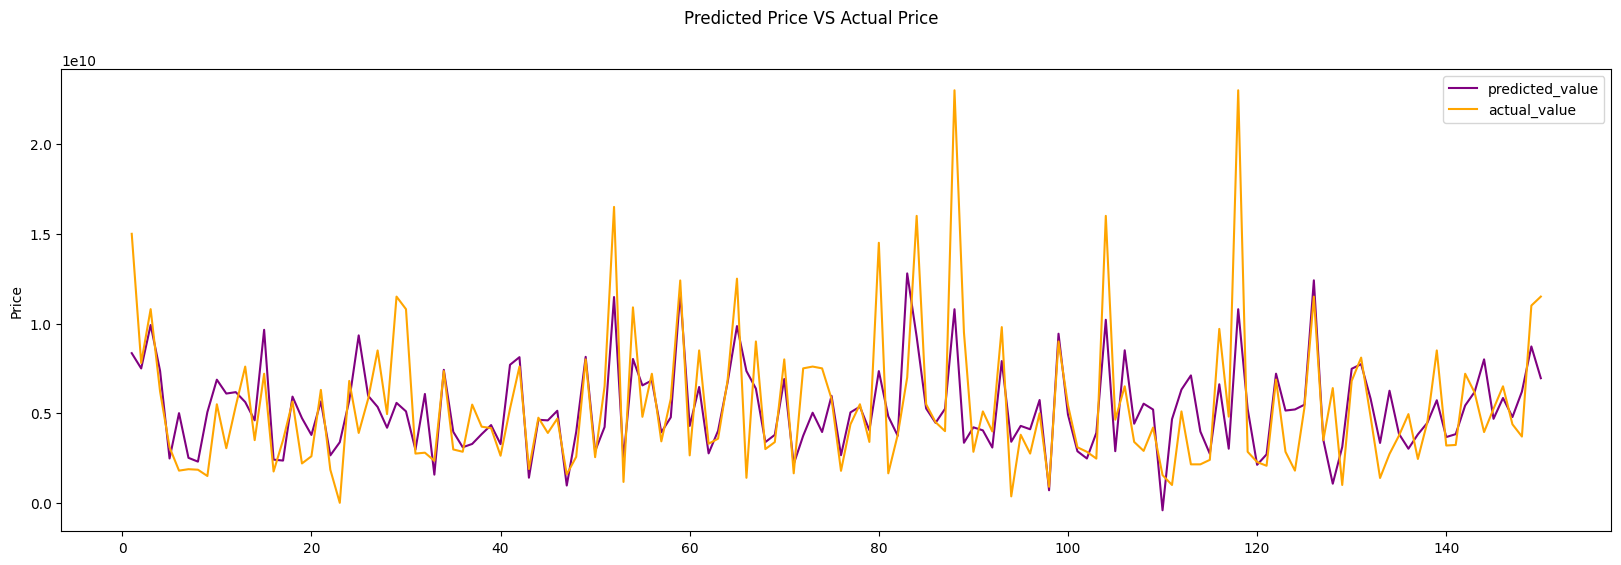

Accuracy score of LinearRegression(copy_X=False, n_jobs=4):
R2: 0.4718608566795477
RMSE: 2786041944.4699564
MAE: 1927141433.756305


(0.4718608566795477, 2786041944.4699564, 1927141433.756305)

In [114]:
lrg_hyper.fit(x_val, y_val)
y_pred_linear_hyper = lrg_hyper.predict(x_val)
plot_residuals(y_val, y_pred_linear_hyper)
accuracy_score(y_val, y_pred_linear_hyper, lrg_hyper)


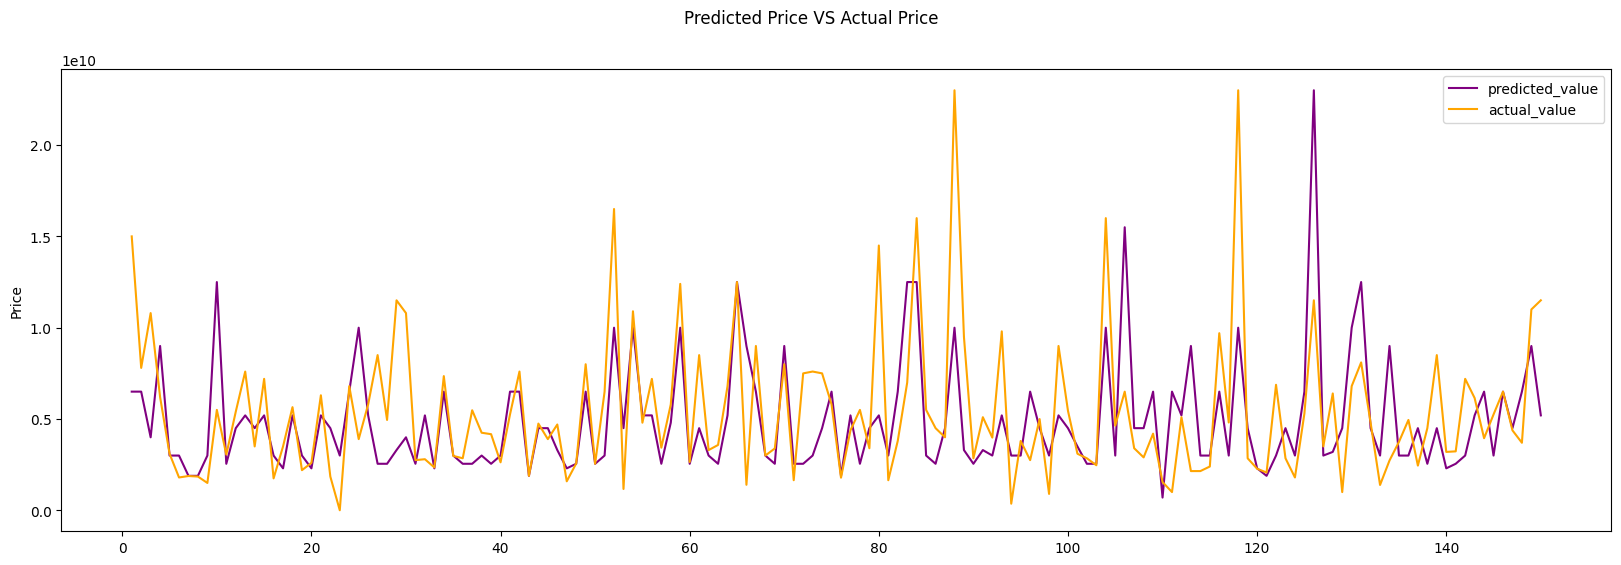

Accuracy score of LogisticRegression(C=0.1):
R2: 0.9230982262518762
RMSE: 1063118438.9065753
MAE: 2173100507.7352815


(0.9230982262518762, 1063118438.9065753, 2173100507.7352815)

In [115]:
log_hyper.fit(x_val, y_val)
y_pred_log_hyper = log_hyper.predict(x_val)
plot_residuals(y_val, y_pred_log_hyper)
accuracy_score(y_val, y_pred_log_hyper, log_hyper)